In [5]:
from scipy.io import loadmat
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()

import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [11]:
##---------------DATOS DE ENTRENAMIENTO -------------------------##
##Cargar los datos con extención .mat
x = loadmat('/DatosEntrenamiento2.mat')

##Traernos los datos del archivo .mat que nos interesan
y = x['data_te']

##Convertir los datos en un array de Numpy
z = np.array(y)

##Convertir el Array en un DataFrame de Pandas
df = pd.DataFrame(z)

##Contar el numero de datos nulos del dataFrame
nulos = np.count_nonzero(pd.isnull(df) == True)
print(nulos)

##Nombrar las Columnas
df.columns = ['uplink_size_mean','uplink_size_median','uplink_size_MAD','uplink_size_STD','uplink_size_Skewness','uplink_size_Kurtosis','uplink_size_MAX','uplink_size_MIN','uplink_size_MeanSquare','downlink_size_mean','downlink_size_median','downlink_size_MAD', 'downlink_size_STD','downlink_size_Skewness','downlink_size_Kurtosis','downlink_size_MAX','downlink_size_MIN','downlink_size_MeanSquare','both_links_size_mean','both_links_size_mean','both_links_size_MAD','both_links_size_STD','both_links_size_Skewness','both_links_size_Kurtosis','both_links_size_MAX','both_links_size_MIN','both_links_size_MeanSquare','uplink_interval_mean','uplink_interval_median','uplink_interval_MAD','uplink_interval_STD','uplink_interval_Skewness','uplink_interval_Kurtosis','uplink_interval_MAX','uplink_interval_MIN','uplink_interval_MeanSquare','downlink_interval_mean','downlink_interval_median','downlink_interval_MAD','downlink_interval_STD','downlink_interval_Skewness','downlink_interval_Kurtosis','downlink_interval_MAX','downlink_interval_MIN','downlink_interval_MeanSquare','both_links_interval_mean','both_links_interval_median','both_links_interval_MAD','both_links_interval_STD','both_links_interval_Skewness','both_links_interval_Kurtosis','both_links_interval_MAX','both_links_interval_MIN','both_links_interval_MeanSquare','Label']
df.sample(8)

0


,uplink_size_mean,uplink_size_median,uplink_size_MAD,uplink_size_STD,uplink_size_Skewness,uplink_size_Kurtosis,uplink_size_MAX,uplink_size_MIN,uplink_size_MeanSquare,downlink_size_mean,downlink_size_median,downlink_size_MAD,downlink_size_STD,downlink_size_Skewness,downlink_size_Kurtosis,downlink_size_MAX,downlink_size_MIN,downlink_size_MeanSquare,both_links_size_mean,both_links_size_mean,both_links_size_MAD,both_links_size_STD,both_links_size_Skewness,both_links_size_Kurtosis,both_links_size_MAX,both_links_size_MIN,both_links_size_MeanSquare,uplink_interval_mean,uplink_interval_median,uplink_interval_MAD,uplink_interval_STD,uplink_interval_Skewness,uplink_interval_Kurtosis,uplink_interval_MAX,uplink_interval_MIN,uplink_interval_MeanSquare,downlink_interval_mean,downlink_interval_median,downlink_interval_MAD,downlink_interval_STD,downlink_interval_Skewness,downlink_interval_Kurtosis,downlink_interval_MAX,downlink_interval_MIN,downlink_interval_MeanSquare,both_links_interval_mean,both_links_interval_median,both_links_interval_MAD,both_links_interval_STD,both_links_interval_Skewness,both_links_interval_Kurtosis,both_links_interval_MAX,both_links_interval_MIN,both_links_interval_MeanSquare,Label
8966,0.002601,0.003184,0.001830,0.002428,2.465338,8.779527,0.017891,0.000078,0.004086,236.208333,29.359806,228.0,0.0000,2.852024,6.471972,332.0,206.0,237.988270,0.002399,0.003020,0.000935,0.001150,2.503193,8.532326,0.017026,0.000319,0.003834,1620.461538,280.401565,1676.0,0.0000,-4.662206,20.124275,1676.0,232.0,1644.082910,0.001254,0.002072,0.000398,0.000354,4.209069,23.884621,0.015872,0.000078,0.002412,956.02,723.890080,1004.0,996.3072,-0.002217,-2.017192,1676.0,206.0,1196.975739,0.0
741,0.012486,0.030161,0.001127,0.001663,3.070440,10.967875,0.116710,0.000005,0.032142,139.607143,43.188938,168.0,19.2738,-0.394304,1.218110,183.0,86.0,145.906893,0.004893,0.021194,0.000029,0.000032,5.423936,31.438807,0.127480,0.000005,0.021608,970.861111,558.717856,1302.0,106.7472,-0.894634,1.873292,1414.0,76.0,1118.213444,0.003523,0.016685,0.000023,0.000024,6.359340,43.228960,0.116710,0.000005,0.016971,738.11,604.230404,909.5,747.9717,-0.032750,1.045384,1414.0,76.0,951.971538,1.0
11200,1.362717,3.762307,0.099835,0.147855,2.666109,5.987884,13.954689,0.000077,3.873097,251.142857,22.799653,240.0,17.7912,0.156852,-2.003136,276.0,228.0,252.102020,0.221478,1.146736,0.000745,0.000724,6.864646,50.723645,9.616178,0.000017,1.161363,1317.953488,604.929629,1676.0,0.0000,-1.095111,-0.774466,1676.0,228.0,1448.684279,0.190780,1.063798,0.000694,0.000752,7.478079,60.242141,9.616178,0.000017,1.075521,1168.60,672.806485,1676.0,0.0000,-0.573125,-1.666037,1676.0,228.0,1346.761983,0.0
14380,0.014998,0.037825,0.000143,0.000166,2.742091,6.815414,0.152215,-0.000157,0.039701,292.611100,148.663900,228.0,0.0000,1.641899,0.746433,617.0,228.0,326.334800,0.005252,0.024754,0.000404,0.000344,5.506379,29.849430,0.158396,0.000085,0.025157,1270.488000,580.448700,1676.0,0.0000,-0.900054,-0.962148,1676.0,240.0,1395.332000,0.004307,0.022100,0.000379,0.000351,6.135557,37.428850,0.153917,-0.000203,0.022407,1094.47,649.634200,1676.0,0.0000,-0.352442,-1.732713,1676.0,228.0,1271.090000,0.0
11329,0.074278,0.133570,0.026587,0.038264,3.033028,10.175257,0.712204,0.000105,0.151531,378.755556,411.626384,228.0,0.0000,2.749704,5.779922,1676.0,228.0,555.991727,0.060758,0.135370,0.000675,0.000809,3.699447,16.033001,0.814058,0.000129,0.147253,614.345455,590.060864,313.0,108.2298,1.104775,-0.749479,1676.0,228.0,848.093016,0.033427,0.091693,0.000494,0.000559,5.018040,30.466535,0.712204,0.000099,0.097164,508.33,528.292123,265.0,54.8562,1.638774,0.749634,1676.0,228.0,731.232542,0.0
8084,0.012299,0.017340,0.004930,0.007130,1.522784,1.220372,0.065785,0.000058,0.021077,255.564103,174.120466,228.0,0.0000,5.771707,32.143342,1315.0,216.0,307.983058,0.008468,0.014696,0.002812,0.003527,2.232276,4.206942,0.067564,0.000165,0.016856,1654.590164,147.923108,1676.0,0.0000,-7.394683,53.739456,1676.0,520.0,1661.081319,0.005165,0.010

In [3]:
#Información General de DataFrame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15687 entries, 0 to 15686
Data columns (total 55 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   uplink_size_mean                15687 non-null  float64
 1   uplink_size_median              15687 non-null  float64
 2   uplink_size_MAD                 15687 non-null  float64
 3   uplink_size_STD                 15687 non-null  float64
 4   uplink_size_Skewness            15687 non-null  float64
 5   uplink_size_Kurtosis            15687 non-null  float64
 6   uplink_size_MAX                 15687 non-null  float64
 7   uplink_size_MIN                 15687 non-null  float64
 8   uplink_size_MeanSquare          15687 non-null  float64
 9   downlink_size_mean              15687 non-null  float64
 10  downlink_size_median            15687 non-null  float64
 11  downlink_size_MAD               15687 non-null  float64
 12  downlink_size_STD               

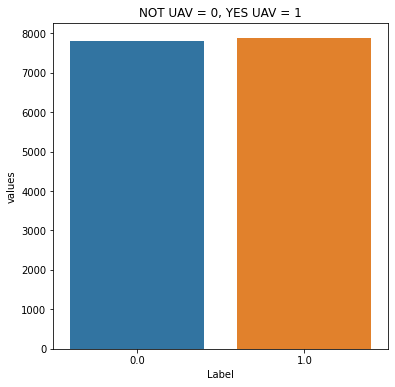

In [6]:
##Contar el número de registros por clase y graficar
temp = df["Label"].value_counts()
dfp = pd.DataFrame({'Label': temp.index,'values': temp.values})
plt.figure(figsize = (6,6))
plt.title('NOT UAV = 0, YES UAV = 1')
sns.set_color_codes("pastel")
sns.barplot(x = 'Label', y="values", data=dfp)
locs, labels = plt.xticks()
plt.show()

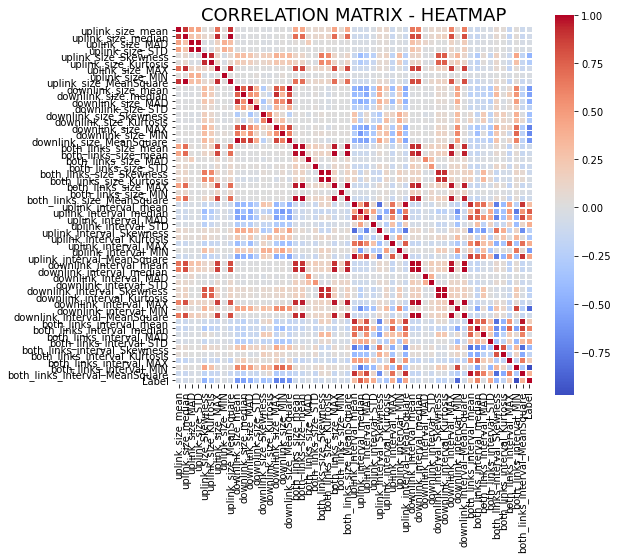

In [12]:
corr = df.corr() # .corr is used to find corelation
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(corr, cbar = True,  square = True, annot = False, fmt= '.1f', 
            xticklabels= True, yticklabels= True
            ,cmap="coolwarm", linewidths=.5, ax=ax)
plt.title('CORRELATION MATRIX - HEATMAP', size=18);

In [13]:
##De Acuerdo a los resultados arrojados por la matriz, las variables que tienen más correlación con otras
##Son:
##Downlink interval-meansquare
##Downlink interval-max
##Downlink interval-median
##Downlink interval mean
##Downlink interval square
##Bothlinks size max
##Bothlinks size mean